### Import Library

yang di sediakan oleh juri

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PreProcessing

In [ ]:
df = pd.read_csv('../../data/Datafull terakhir test.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8213 entries, 0 to 8212
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0x      8213 non-null   float64
 1   0y      8213 non-null   float64
 2   1x      8213 non-null   float64
 3   1y      8213 non-null   float64
 4   2x      8213 non-null   float64
 5   2y      8213 non-null   float64
 6   3x      8213 non-null   float64
 7   3y      8213 non-null   float64
 8   4x      8213 non-null   float64
 9   4y      8213 non-null   float64
 10  5x      8213 non-null   float64
 11  5y      8213 non-null   float64
 12  6x      8213 non-null   float64
 13  6y      8213 non-null   float64
 14  7x      8213 non-null   float64
 15  7y      8213 non-null   float64
 16  8x      8213 non-null   float64
 17  8y      8213 non-null   float64
 18  9x      8213 non-null   float64
 19  9y      8213 non-null   float64
 20  10x     8213 non-null   float64
 21  10y     8213 non-null   float64
 22  

#### Memberikan Style ke table agar table lebih menarik dan mudah di baca

In [33]:
color_variance = ['#0b559f', '#2b7bba', '#539ecd', '#89bedc', '#bad6eb', '#dbe9f6']

df_style = {
    "border" : "1px solid black",
    "border-collapse" : "collapse",
    "color" : "white",
    "background-color" : color_variance[0],
    "font-szie" : "14px"
}

table_style = [
    {"selector" : "th", "props": [("background-color" , color_variance[0]), ("border", "1px solid black"), ("color", "white")]},
    {"selector" : "th.col_heading", "props": [("background-color" , color_variance[0]), ("border", "1px solid black"), ("color", "white")]},
    {"selector" : "th.row_heading", "props": [("background-color" , color_variance[0]), ("border", "1px solid black"), ("color", "white")]},
    {"selector" : "tr:nth-child(even) td", "props": [("background-color" , color_variance[2])]},
    {"selector" : "tr:nth-child(odd) td", "props": [("background-color" , color_variance[1])]},
    {"selector" : "td", "props": [("border" , "1px solid black")]}
]

### Preview dataset

In [34]:
df.head().style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,449.429000,643.857000,327.271000,587.170000,265.731000,484.233000,246.689000,362.602000,231.657000,252.290000,360.884000,377.397000,363.109000,244.004000,354.410000,313.359000,346.489000,362.379000,433.281000,391.426000,435.355000,246.869000,412.976000,376.304000,403.950000,444.913000,506.447000,408.433000,513.091000,285.027000,481.830000,420.966000,473.302000,480.806000,582.295000,427.375000,587.343000,339.388000,547.296000,415.208000,536.242000,454.387000,nan
1,451.351000,653.700000,333.252000,594.944000,265.111000,486.310000,256.936000,354.813000,248.984000,239.251000,359.198000,380.020000,368.258000,250.857000,354.476000,344.851000,346.646000,409.193000,440.803000,396.510000,454.738000,255.772000,422.677000,395.540000,411.797000,468.115000,516.261000,414.213000,533.575000,287.628000,493.925000,426.902000,487.976000,491.502000,598.279000,438.230000,609.486000,345.403000,559.002000,414.437000,543.311000,457.700000,A
2,457.565000,692.363000,335.312000,635.283000,267.992000,518.501000,261.948000,388.552000,264.993000,288.713000,368.624000,385.086000,372.389000,267.188000,371.649000,360.794000,371.645000,421.847000,440.985000,398.569000,451.263000,283.505000,432.325000,415.785000,427.730000,480.256000,510.835000,419.127000,529.195000,310.469000,496.712000,437.848000,492.464000,490.838000,584.324000,453.037000,589.529000,370.452000,548.982000,435.461000,536.997000,465.605000,A
3,454.034000,534.794000,333.222000,489.421000,258.394000,399.013000,232.771000,269.755000,218.668000,160.658000,315.157000,310.358000,315.451000,171.108000,322.636000,227.749000,325.991000,268.602000,390.424000,313.667000,389.210000,165.242000,375.874000,285.715000,369.374000,352.610000,460.156000,314.143000,462.445000,175.915000,448.669000,301.393000,448.802000,358.808000,537.166000,308.455000,531.600000,212.394000,505.065000,284.374000,499.484000,329.256000,A
4,449.840000,545.633000,327.645000,504.473000,256.748000,405.653000,228.244000,273.756000,210.097000,166.311000,321.690000,300.292000,322.043000,170.581000,328.553000,251.784000,333.386000,308.906000,398.443000,311.010000,392.894000,171.972000,382.359000,292.786000,384.574000,360.037000,469.496000,313.724000,474.891000,188.099000,455.471000,309.919000,454.644000,365.462000,545.115000,312.461000,548.587000,221.122000,514.636000,287.484000,503.828000,326.010000,A


### Membagi Kolom Numerik dan Kategorikal untuk memudahkan Analisis

In [35]:
num_col = df.select_dtypes(include='number').columns.to_list()
cat_col = df.select_dtypes(include='object').columns.to_list()

print(f'Numerikal Kolom : {num_col}')
print(f'Kategorikal Kolom : {cat_col}')

Numerikal Kolom : ['0x', '0y', '1x', '1y', '2x', '2y', '3x', '3y', '4x', '4y', '5x', '5y', '6x', '6y', '7x', '7y', '8x', '8y', '9x', '9y', '10x', '10y', '11x', '11y', '12x', '12y', '13x', '13y', '14x', '14y', '15x', '15y', '16x', '16y', '17x', '17y', '18x', '18y', '19x', '19y', '20x', '20y']
Kategorikal Kolom : ['char']


### Cek Nilai Unik di kolom kategori

ini untuk menganalisa jika terjadi anomali values di dalam kolom yang tidak terdeteksi sebagai null dan jika nilai nya sedikit maka akan susah mencari nya contoh seperti __?__ dan lain sebagainya

In [36]:
for col in cat_col:
    print(f'{col} : {df[col].unique()}')

char : [nan 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y']


### Cek Missing Values

In [37]:
df.isnull().sum().to_frame().T.style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,3,5,0,2,1,1,0,0,0,0,0,19


### Mengisi Nilai Nan di kolom char dengan Forward Fill

In [38]:
df['char'] = df['char'].fillna(df['char'].ffill())
df.head().style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,449.429000,643.857000,327.271000,587.170000,265.731000,484.233000,246.689000,362.602000,231.657000,252.290000,360.884000,377.397000,363.109000,244.004000,354.410000,313.359000,346.489000,362.379000,433.281000,391.426000,435.355000,246.869000,412.976000,376.304000,403.950000,444.913000,506.447000,408.433000,513.091000,285.027000,481.830000,420.966000,473.302000,480.806000,582.295000,427.375000,587.343000,339.388000,547.296000,415.208000,536.242000,454.387000,nan
1,451.351000,653.700000,333.252000,594.944000,265.111000,486.310000,256.936000,354.813000,248.984000,239.251000,359.198000,380.020000,368.258000,250.857000,354.476000,344.851000,346.646000,409.193000,440.803000,396.510000,454.738000,255.772000,422.677000,395.540000,411.797000,468.115000,516.261000,414.213000,533.575000,287.628000,493.925000,426.902000,487.976000,491.502000,598.279000,438.230000,609.486000,345.403000,559.002000,414.437000,543.311000,457.700000,A
2,457.565000,692.363000,335.312000,635.283000,267.992000,518.501000,261.948000,388.552000,264.993000,288.713000,368.624000,385.086000,372.389000,267.188000,371.649000,360.794000,371.645000,421.847000,440.985000,398.569000,451.263000,283.505000,432.325000,415.785000,427.730000,480.256000,510.835000,419.127000,529.195000,310.469000,496.712000,437.848000,492.464000,490.838000,584.324000,453.037000,589.529000,370.452000,548.982000,435.461000,536.997000,465.605000,A
3,454.034000,534.794000,333.222000,489.421000,258.394000,399.013000,232.771000,269.755000,218.668000,160.658000,315.157000,310.358000,315.451000,171.108000,322.636000,227.749000,325.991000,268.602000,390.424000,313.667000,389.210000,165.242000,375.874000,285.715000,369.374000,352.610000,460.156000,314.143000,462.445000,175.915000,448.669000,301.393000,448.802000,358.808000,537.166000,308.455000,531.600000,212.394000,505.065000,284.374000,499.484000,329.256000,A
4,449.840000,545.633000,327.645000,504.473000,256.748000,405.653000,228.244000,273.756000,210.097000,166.311000,321.690000,300.292000,322.043000,170.581000,328.553000,251.784000,333.386000,308.906000,398.443000,311.010000,392.894000,171.972000,382.359000,292.786000,384.574000,360.037000,469.496000,313.724000,474.891000,188.099000,455.471000,309.919000,454.644000,365.462000,545.115000,312.461000,548.587000,221.122000,514.636000,287.484000,503.828000,326.010000,A


### Drop Nilai Null atau Nan

In [39]:
df = df.dropna()
df.isnull().sum().to_frame().T.style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cek dan Hapus kolom yang datanya ada data duplikat

In [40]:
print(df.duplicated().sum())

4


In [41]:
print(df.drop_duplicates(inplace=True))

None


### Menangani Outlier

In [42]:
df_all_outlier = df.copy()
for col in num_col:
    Q1 = df_all_outlier[col].quantile(0.25)
    Q3 = df_all_outlier[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_all_outliers = df_all_outlier[(df_all_outlier[col] >= lower) & (df_all_outlier[col] <= upper)]

In [43]:
print(f'Sebelum di IQR : {df.shape}')
print(f'Setelah di IQR : {df_all_outliers.shape}')

Sebelum di IQR : (8191, 43)
Setelah di IQR : (7746, 43)


### Visualisasi Outlier

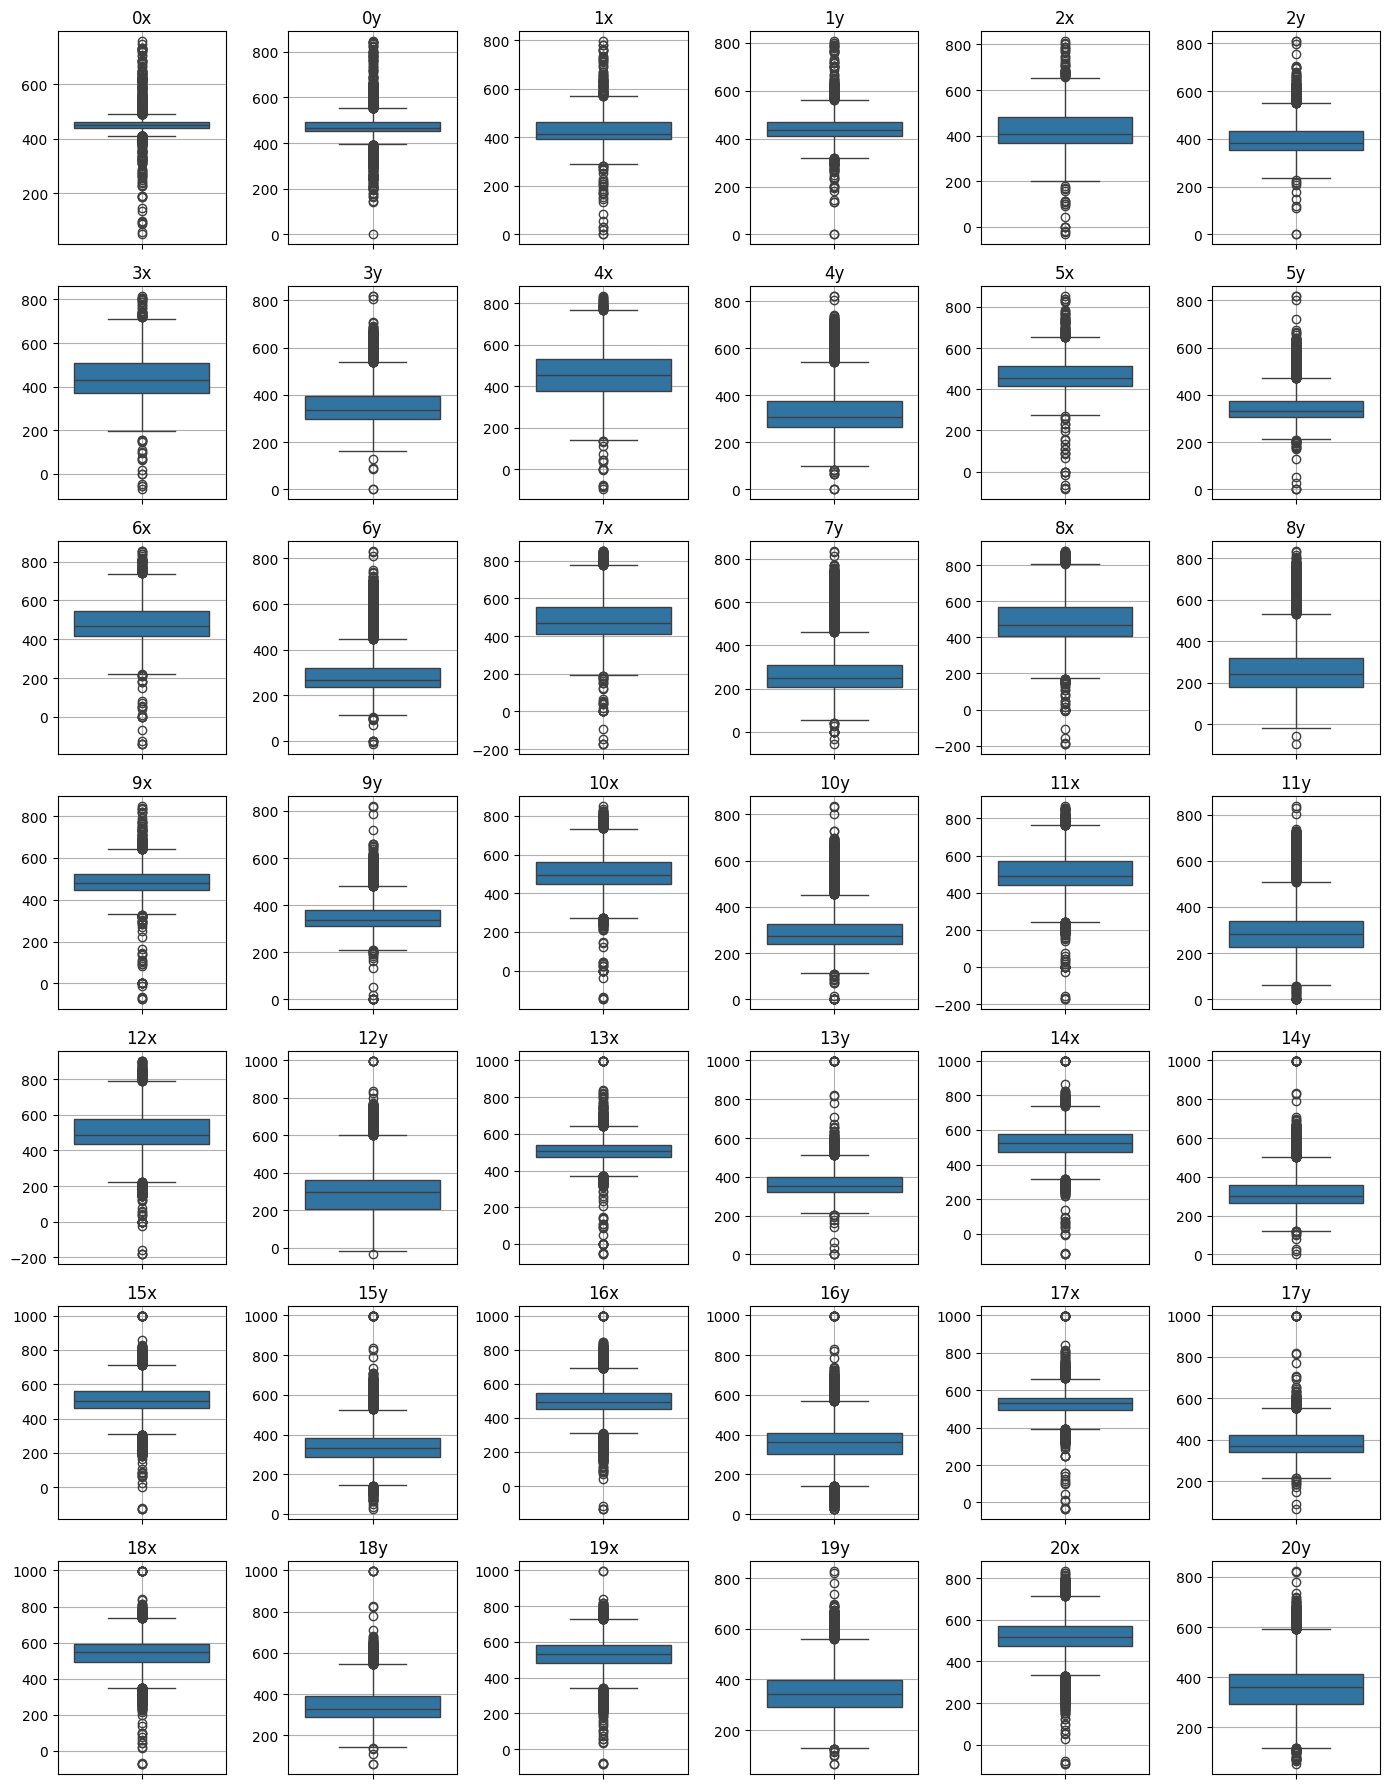

In [44]:
n_col = 6
n_rows = int(np.ceil(len(num_col) / n_col))

fig, axes = plt.subplots(n_rows, n_col, figsize=(n_rows * 2, n_col * 3))
axes = axes.flatten()

for i, col in enumerate(num_col):
    data = df[col]
    ax = axes[i]
    
    ax.set_title(col)
    sns.boxplot(y=data, ax=ax)
    ax.set_ylabel(None)
    ax.grid(True)
    
for j in range(len(num_col), n_rows * n_col):
    plt.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Visualisasi Outlier setelah menggunakan IQR

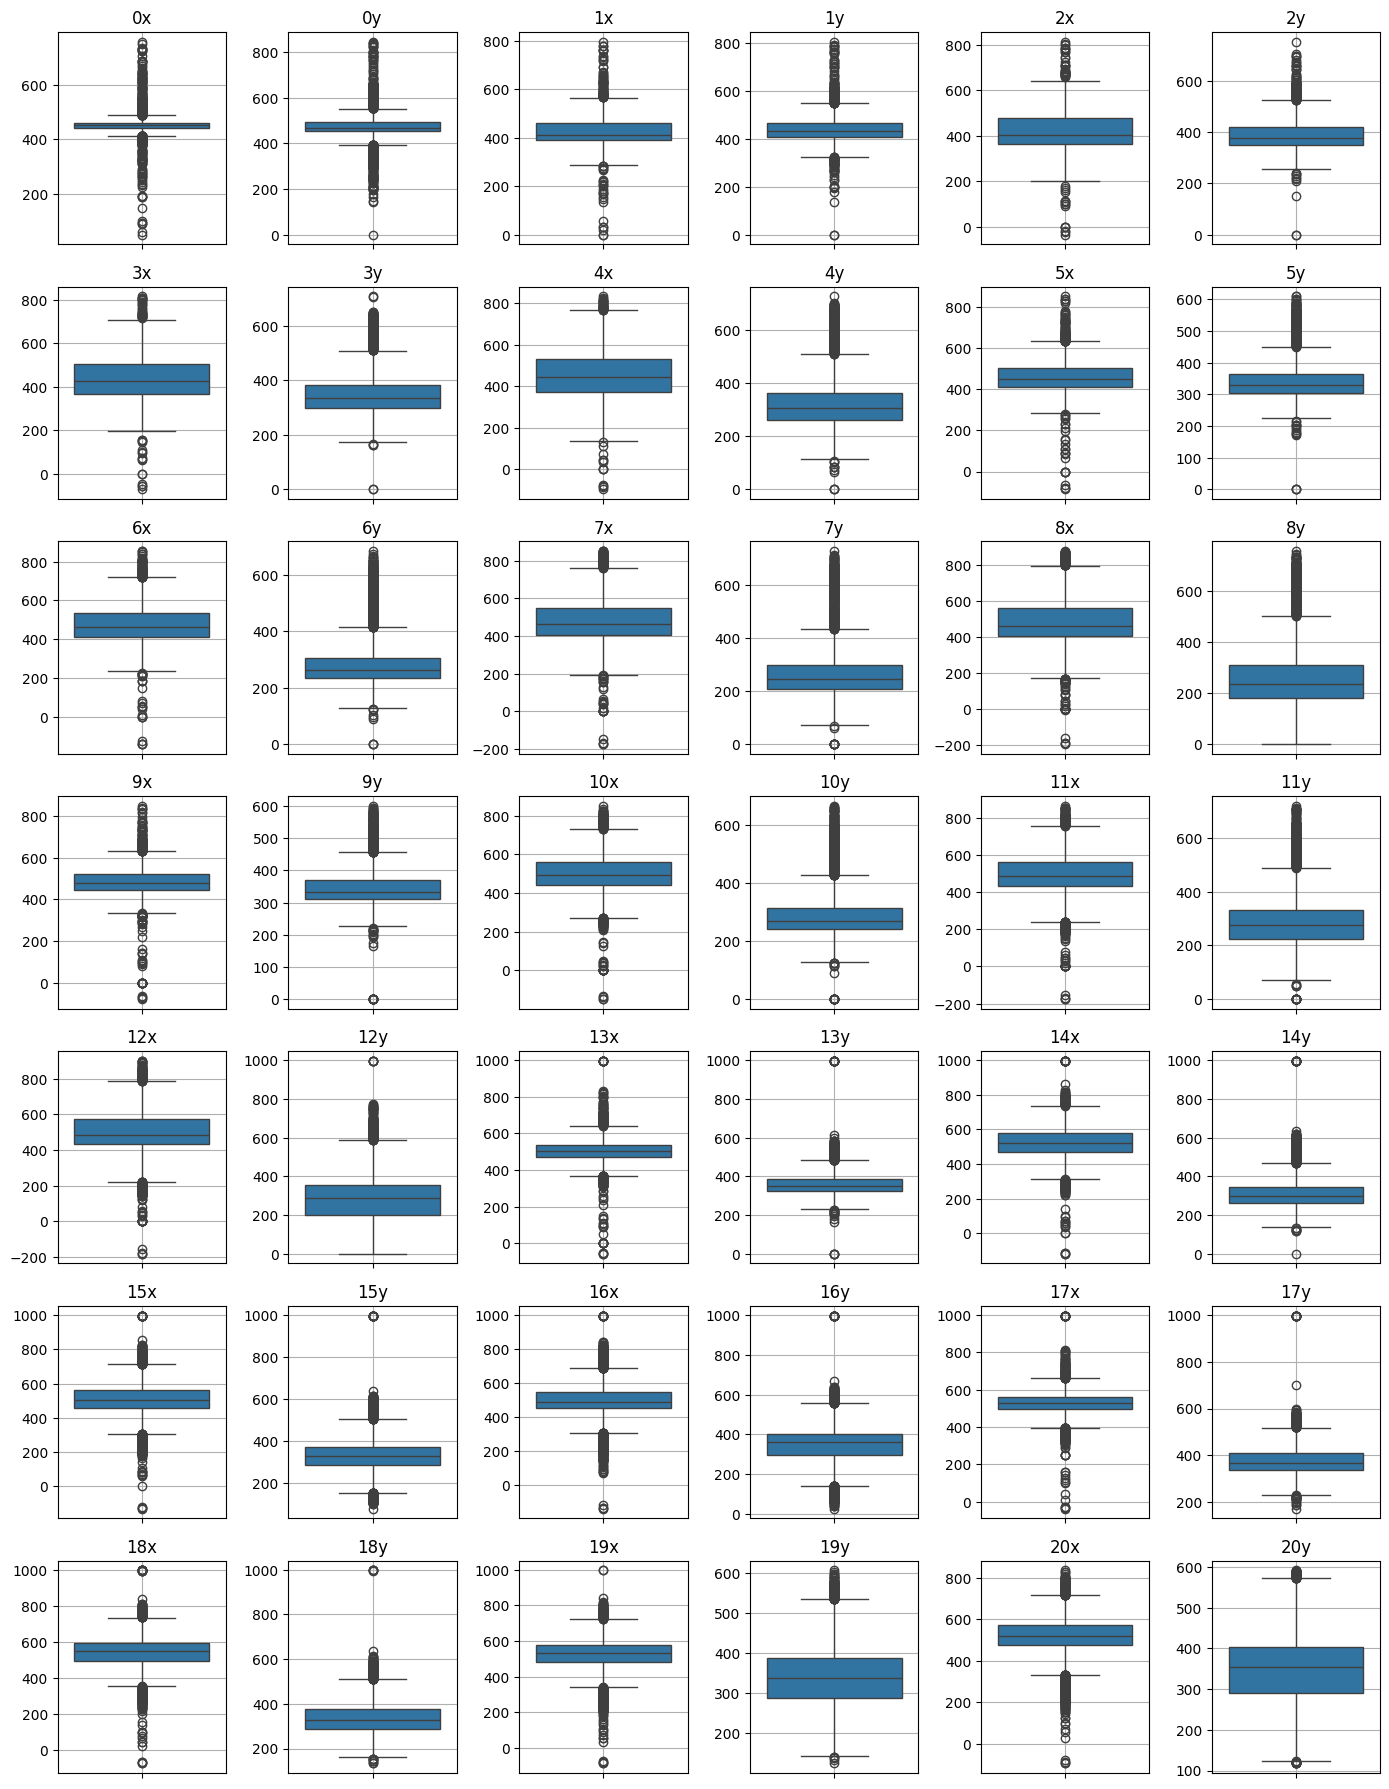

In [45]:
n_col = 6
n_rows = int(np.ceil(len(num_col) / n_col))

fig, axes = plt.subplots(n_rows, n_col, figsize=(n_rows * 2, n_col * 3))
axes = axes.flatten()

for i, col in enumerate(num_col):
    data = df_all_outliers[col]
    ax = axes[i]
    
    ax.set_title(col)
    sns.boxplot(y=data, ax=ax)
    ax.set_ylabel(None)
    ax.grid(True)
    
for j in range(len(num_col), n_rows * n_col):
    plt.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

# Feature Selection

### Encoding Kolom Kategorikal

kenapa kolom yang kategorikal harus di encoding? karena model hanya bisa membaca angka tidak bisa membaca text atau string maka kita perlu melakukan encoding untuk mengubah string atau text ke numerik atau angka, contoh seperti diatas

In [46]:
def label_encoder(df: pd.DataFrame):
    struct = dict()
    
    for col in df.select_dtypes("object").columns:
        unq = df[col].unique()
        unq_map = {v: k for k, v in enumerate(unq)}
        
        struct[col] = unq_map
        df[col] = df[col].map(unq_map)
    
    return df, struct

df_enc = df_all_outliers.copy()
df_enc, struct = label_encoder(df_enc)
df_enc.head().style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
1,451.351000,653.700000,333.252000,594.944000,265.111000,486.310000,256.936000,354.813000,248.984000,239.251000,359.198000,380.020000,368.258000,250.857000,354.476000,344.851000,346.646000,409.193000,440.803000,396.510000,454.738000,255.772000,422.677000,395.540000,411.797000,468.115000,516.261000,414.213000,533.575000,287.628000,493.925000,426.902000,487.976000,491.502000,598.279000,438.230000,609.486000,345.403000,559.002000,414.437000,543.311000,457.700000,0
2,457.565000,692.363000,335.312000,635.283000,267.992000,518.501000,261.948000,388.552000,264.993000,288.713000,368.624000,385.086000,372.389000,267.188000,371.649000,360.794000,371.645000,421.847000,440.985000,398.569000,451.263000,283.505000,432.325000,415.785000,427.730000,480.256000,510.835000,419.127000,529.195000,310.469000,496.712000,437.848000,492.464000,490.838000,584.324000,453.037000,589.529000,370.452000,548.982000,435.461000,536.997000,465.605000,0
3,454.034000,534.794000,333.222000,489.421000,258.394000,399.013000,232.771000,269.755000,218.668000,160.658000,315.157000,310.358000,315.451000,171.108000,322.636000,227.749000,325.991000,268.602000,390.424000,313.667000,389.210000,165.242000,375.874000,285.715000,369.374000,352.610000,460.156000,314.143000,462.445000,175.915000,448.669000,301.393000,448.802000,358.808000,537.166000,308.455000,531.600000,212.394000,505.065000,284.374000,499.484000,329.256000,0
4,449.840000,545.633000,327.645000,504.473000,256.748000,405.653000,228.244000,273.756000,210.097000,166.311000,321.690000,300.292000,322.043000,170.581000,328.553000,251.784000,333.386000,308.906000,398.443000,311.010000,392.894000,171.972000,382.359000,292.786000,384.574000,360.037000,469.496000,313.724000,474.891000,188.099000,455.471000,309.919000,454.644000,365.462000,545.115000,312.461000,548.587000,221.122000,514.636000,287.484000,503.828000,326.010000,0
5,463.842000,550.886000,334.868000,506.275000,258.927000,407.689000,242.522000,275.063000,240.289000,165.256000,344.741000,292.345000,331.180000,175.742000,332.242000,263.398000,336.843000,327.126000,422.553000,302.328000,402.248000,166.150000,393.401000,288.414000,403.548000,360.955000,494.348000,308.548000,483.814000,181.491000,466.818000,301.972000,472.880000,362.204000,572.307000,316.280000,568.785000,218.200000,536.225000,272.665000,530.120000,311.422000,0


data  kategorikal akan berubah menjai numerik, bisa di lihat kolom char

In [47]:
pd.DataFrame(struct).T.style.set_properties(**df_style).set_table_styles(table_style)

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
char,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23


ini adalah versi struktur nya bisa kita lihat A menjadi 0 dan B menjadi 1 dan seterusnya

In [48]:
df_fe_select = df_enc.drop(columns=['0x', '0y', '1x', '1y', '2x', '2y'])
df_fe_select.head().style.set_properties(**df_style).set_table_styles(table_style)

,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
1,256.936000,354.813000,248.984000,239.251000,359.198000,380.020000,368.258000,250.857000,354.476000,344.851000,346.646000,409.193000,440.803000,396.510000,454.738000,255.772000,422.677000,395.540000,411.797000,468.115000,516.261000,414.213000,533.575000,287.628000,493.925000,426.902000,487.976000,491.502000,598.279000,438.230000,609.486000,345.403000,559.002000,414.437000,543.311000,457.700000,0
2,261.948000,388.552000,264.993000,288.713000,368.624000,385.086000,372.389000,267.188000,371.649000,360.794000,371.645000,421.847000,440.985000,398.569000,451.263000,283.505000,432.325000,415.785000,427.730000,480.256000,510.835000,419.127000,529.195000,310.469000,496.712000,437.848000,492.464000,490.838000,584.324000,453.037000,589.529000,370.452000,548.982000,435.461000,536.997000,465.605000,0
3,232.771000,269.755000,218.668000,160.658000,315.157000,310.358000,315.451000,171.108000,322.636000,227.749000,325.991000,268.602000,390.424000,313.667000,389.210000,165.242000,375.874000,285.715000,369.374000,352.610000,460.156000,314.143000,462.445000,175.915000,448.669000,301.393000,448.802000,358.808000,537.166000,308.455000,531.600000,212.394000,505.065000,284.374000,499.484000,329.256000,0
4,228.244000,273.756000,210.097000,166.311000,321.690000,300.292000,322.043000,170.581000,328.553000,251.784000,333.386000,308.906000,398.443000,311.010000,392.894000,171.972000,382.359000,292.786000,384.574000,360.037000,469.496000,313.724000,474.891000,188.099000,455.471000,309.919000,454.644000,365.462000,545.115000,312.461000,548.587000,221.122000,514.636000,287.484000,503.828000,326.010000,0
5,242.522000,275.063000,240.289000,165.256000,344.741000,292.345000,331.180000,175.742000,332.242000,263.398000,336.843000,327.126000,422.553000,302.328000,402.248000,166.150000,393.401000,288.414000,403.548000,360.955000,494.348000,308.548000,483.814000,181.491000,466.818000,301.972000,472.880000,362.204000,572.307000,316.280000,568.785000,218.200000,536.225000,272.665000,530.120000,311.422000,0


In [52]:
print(f"Fitur yang di hapus : 0x, 0y, 1x, 1y, 2x, 2y")

Fitur yang di hapus : 0x, 0y, 1x, 1y, 2x, 2y


In [50]:
fitur = pd.DataFrame([col for col in num_col if col not in ['0x', '0y', '1x', '1y', '2x', '2y']])
print('Fitur Yang di Pertahankan : ')
fitur.T.style.set_properties(**df_style).set_table_styles(table_style)

Fitur Yang di Pertahankan : 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y


#### Simpan Dataset yang sudah di Clean ke Csv

In [ ]:
# df_final = df_fe_select
# df_final.to_csv('../../data/resultsClean_DataFull_Terakhir_Test.csv', index=False)